In [1]:
import pandas as pd
import fiona
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
from descartes import PolygonPatch
from shapely.geometry import Polygon, MultiPolygon, shape

In [2]:
od_freguesia = pd.read_csv('intermediate-data/demand.csv')

In [3]:
all_counties = MultiPolygon(
    [shape(pol['geometry']) for pol in fiona.open("external-data/gadm36_PRT_shp/gadm36_PRT_2.shp")])
origin_counties = MultiPolygon(
    [shape(pol['geometry']) for pol in fiona.open("external-data/gadm36_PRT_shp/gadm36_PRT_2.shp")
    if pol['properties']['NAME_2'] in od_freguesia.County_of_Origin.unique()])
in_freguesias = MultiPolygon(
    [shape(pol['geometry']) for pol in fiona.open("external-data/gadm36_PRT_shp/gadm36_PRT_3.shp")
    if pol['properties']['NAME_3'] in od_freguesia.Parish_of_Public_Transportation.unique()])
not_in_freguesias = MultiPolygon(
    [shape(pol['geometry']) for pol in fiona.open("external-data/gadm36_PRT_shp/gadm36_PRT_3.shp")
    if pol['properties']['NAME_3'] not in od_freguesia.Parish_of_Public_Transportation.unique()])
all_freguesias = MultiPolygon(
    [shape(pol['geometry']) for pol in fiona.open("external-data/gadm36_PRT_shp/gadm36_PRT_3.shp")])

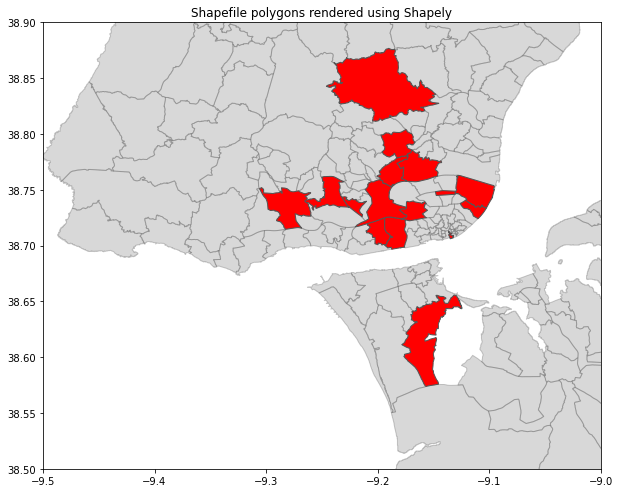

In [6]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
#minx, miny, maxx, maxy = mp.bounds
#w, h = maxx - minx, maxy - miny
#ax.set_xlim(minx - 0.2 * w, maxx + 0.2 * w)
#ax.set_ylim(miny - 0.2 * h, maxy + 0.2 * h)

# Whole Country
#ax.set_xlim(-9.5, -6.2)
#ax.set_ylim(37, 42.2)

# Lisbon Area
ax.set_xlim(-9.5, -9)
ax.set_ylim(38.5, 38.9)

ax.set_aspect(1)

patches = []
for idx, p in enumerate(not_in_freguesias):
    patches.append(PolygonPatch(p, fc='grey', ec='#555555', alpha=0.3, zorder=2))
for idx, p in enumerate(in_freguesias):
    patches.append(PolygonPatch(p, fc='red', ec='#555555', alpha=1., zorder=1))
#for idx, p in enumerate(all_counties):
#    patches.append(PolygonPatch(p, fc='grey', ec='#555555', alpha=0.3, zorder=2))
#for idx, p in enumerate(origin_counties):
#    patches.append(PolygonPatch(p, fc='red', ec='#555555', alpha=1., zorder=1))
ax.add_collection(PatchCollection(patches, match_original=True))

plt.show()